<a href="https://www.kaggle.com/code/derekeodice/e-commerce-shipping-analysis?scriptVersionId=271615273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <u>Introduction</u><br>
<p>Like most other industries, the demands placed on the Shipping and Transportation industry require it to move faster every day. It wasn't uncommon 25 years ago for customers to have to wait 4-6 weeks for delivery of a CD they bought from a TV commercial. Today, that same product could very well be delivered the same day with Amazon Prime. Businesses small and large now look to reliable, fast supply chains to get products to their customers with ever increasing efficiency. However, with increased efficiency and speed comes the increased need for data analytics.</p>
<p>This dataset seeks to analyze the historical data of one such business. It is worth noting that this business, like many others in the E-Commerce industry, operate in a cutthroat market. Ergo, these companies must differentiate themselves in terms of speed and customer service. At it's core, this dataset seeks to understand if customer requirements for on-time delivery are being met. This dataset contains 12 variables (including the ID column) and a total of 10,999 shipments. The 12 variables we will analyze are:</p>

- Warehouse Block (Warehouse_block)
- Mode of Shipment (Mode_of_Shipment)
- Customer Rating (Customer_rating)
- Cost of the Product (Cost_of_the_Product)
- Prior Purchases (Prior_purchases)
- Product Importance (Product_importance)
- Gender (Gender)
- Discounts Offered (Discounts_offered)
- Weight (Weight_in_gms)
- Reached on Time Y/N (Reached.on.Time_Y.N)

<p>We will begin the analysis by uploading the data via Pandas and performing any necessary data cleansing. From there, we will perform exploratory data analysis (EDA) to gain some introductory insights into our data. Finally, we will answer the following questions posed by the dataset creator from Kaggle.</p>

1. What was the Customer Rating? And was the product delivered on time?
2. Was the customer’s query answered?
3. For products with high importance, do they have the highest ratings or are they delivered on time?

<div style="page-break-after:always;"></div>

# Step 1: Data Import and Data Cleansing

Our first step is to import the data directly from Kaggle. We will use the kagglehub package to link our Jupyter Notebook direclty to Kaggle and download from there. Once we have the data downloaded from kaggle, we will import the dataset into our Jupyter Notebook using `read_csv` from Pandas.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


import kagglehub

# Download latest version
path = kagglehub.dataset_download("prachi13/customer-analytics")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-analytics


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/customer-analytics/Train.csv")

# Inspect the first few rows of the dataset
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# Check the datatypes and shape of our data
print(df.dtypes)
print(df.shape)

# Check for anomalies or badly formatted data in each of the columns.
print(f"\n{df['Warehouse_block'].value_counts():}")
print(f"\n{df['Mode_of_Shipment'].value_counts()}")
print(f"\n{round(df['Customer_care_calls'].describe(),2)}")
print(f"\n{round(df['Customer_rating'].describe(),2)}")
print(f"\n{round(df['Cost_of_the_Product'].describe(),2)}")
print(f"\n{round(df['Prior_purchases'].describe(),2)}")
print(f"\n{round(df['Product_importance'].value_counts(),2)}")
print(f"\n{round(df['Gender'].value_counts(),2)}")
print(f"\n{round(df['Discount_offered'].describe(),2)}")
print(f"\n{round(df['Weight_in_gms'].describe(),2)}")

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
(10999, 12)

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

count    10999.00
mean         4.05
std          1.14
min          2.00
25%          3.00
50%          4.00
75%          5.00
max          7.00
Name: Customer_care_calls, dtype: float64

count    10999.00
mean         2.99
std          1.41
min          1.00
25%          2.00
50%          3.00
75%          4.00
max          5.00
Name: Customer_rating, dtype: float64

count    10999.00
mean       210.20
std         48.06
min    

<p>Our initial analysis yielded a dataframe of types `object` and `int64` across all 12 columns. The dataframe shape of (10999, 12) indicated no irregularities in the shape of the dataframe itself. The test of data integrity for each column yielded no errors nor anomalies that could otherwise jeopardize further data analysis. Therefore, no further data cleansing is required prior to conducting exploratory data analysis (EDA).</p>

<div style="page-break-after:always;"></div>

# Step 2: EDA

<p>Now that we've confirmed our data upload and data integrity (clean, structured data for analysis), we can begin our exploratory data analysis (hereon referred to as EDA). Our first step in this section is to segment the numeric data from the dataframe for easier analysis. We will do this by creating a dataframe titled `numeric` that selects the `int64` data type. We will then drop the ID column from our numeric dataframe, as this will not yield noteworthy results. Our final step in this process is to perform summary statistics on the remaining numeric columns.</p>

In [4]:
'''Now that we have our initial dataframe, we need to check the data types.'''
print(df.dtypes)

'''Lets' create a numeric dataframe to get some basic statistics.'''
numeric = df.select_dtypes(include=["int64"])
numeric = df.drop(['ID'], axis=1)
numeric.describe().round(2)

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,4.05,2.99,210.20,3.57,13.37,3634.02,0.60
std,1.14,1.41,48.06,1.52,16.21,1635.38,0.49
min,2.00,1.00,96.00,2.00,1.00,1001.00,0.00
25%,3.00,2.00,169.00,3.00,4.00,1839.50,0.00
50%,4.00,3.00,214.00,3.00,7.00,4149.00,1.00
75%,5.00,4.00,251.00,4.00,10.00,5050.00,1.00
max,7.00,5.00,310.00,10.00,65.00,7846.00,1.00


<p> Understanding the end-to-end flow of cargo in the logistics indsutry is imperative for success. While this dataset does not include all steps of the shipping process, it does contain detailed information about the origin warehouses. Our datset in particular ccontaines 5 warehouses for the 10,999 shipments in question. We will take a look at the total number of shipments and overall percentage of shipments from each warehouse as part of our EDA. We will do this by first creating a dataset caleld `warehouse_summary` by using the `groupby` function. Next, we will calculate the sum of all of the shipments and use this to create a column that calculates the percentage of shipments from each warehouse (`% of Total Shipments`). </p>

In [5]:
# Create a warehouse block summary

warehouse_summary = (
    df.groupby('Warehouse_block')
    .size()
    .reset_index(name='Warehouse Block Shipments')
)

# Get a percentile representation across the whole dataset
warehouse_shipments_all = warehouse_summary['Warehouse Block Shipments'].sum()

warehouse_summary['% of Total Shipments'] = (
    warehouse_summary['Warehouse Block Shipments']/warehouse_shipments_all
)*100

# Round the result to two decimal places
warehouse_summary['% of Total Shipments'] = warehouse_summary['% of Total Shipments'].round(2)

# Test the new dataframe
warehouse_summary

,Warehouse_block,Warehouse Block Shipments,% of Total Shipments
0,A,1833,16.67
1,B,1833,16.67
2,C,1833,16.67
3,D,1834,16.67
4,F,3666,33.33


In [6]:
'''
In the following lines of code, we need to find the blocks and modes of shipments with the most shipments. 
'''
# WAREHOUSE

# Find the integer-location index (iloc index) of the maximum value
iloc_index_of_max = warehouse_summary['Warehouse Block Shipments'].idxmax()

# Use .iloc to find the row with the highest shipments
row_with_highest_shipments = warehouse_summary.iloc[iloc_index_of_max]

# Extract values
warehouse_block = row_with_highest_shipments['Warehouse_block']
total_shipments = row_with_highest_shipments['Warehouse Block Shipments']

# SHIPMENT MODE

Now that we have a clean dataset, the next step is to get a basic understanding of our data. We will start by gathering some summary statistics on the dataset as a whole, and some of the points of interest as outlined in the instructions on Kaggle.

In [7]:
print("--Warehouse and Dataframe Summaries--")
print(f"The number of rows in our data frame is {len(df)}.")
print(f"The number of rows in our data frame is {df.shape[1]}.")
print(f"The total number of datapoints in our dataset is {df.shape[1] * len(df)}.")
print(f"The warehouse block with the most shipments was {warehouse_block} with {total_shipments} shipments.")

print("\n--Customer and Shipment Summaries--")
print(f"The average customer called {numeric['Customer_care_calls'].mean():.0f} times about their shipment(s), rated their experience a {numeric['Customer_rating'].mean():.2f} out of {numeric['Customer_rating'].max()}, and made {numeric['Prior_purchases'].mean():.0f} prior purchases.")
print(f"The average product cost ${numeric['Cost_of_the_Product'].mean():.2f}, was discounted an average of {numeric['Discount_offered'].mean():.2f}%, and weighed an average of {numeric['Weight_in_gms'].mean():.2f} grams.")
print(f"With the understanding that 1 = 'No' and 0 = 'Yes', our mean value of {numeric['Reached.on.Time_Y.N'].mean():.2f} indicates that the majority of the shipments did not arrive on time.")

--Warehouse and Dataframe Summaries--
The number of rows in our data frame is 10999.
The number of rows in our data frame is 12.
The total number of datapoints in our dataset is 131988.
The warehouse block with the most shipments was F with 3666 shipments.

--Customer and Shipment Summaries--
The average customer called 4 times about their shipment(s), rated their experience a 2.99 out of 5, and made 4 prior purchases.
The average product cost $210.20, was discounted an average of 13.37%, and weighed an average of 3634.02 grams.
With the understanding that 1 = 'No' and 0 = 'Yes', our mean value of 0.60 indicates that the majority of the shipments did not arrive on time.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


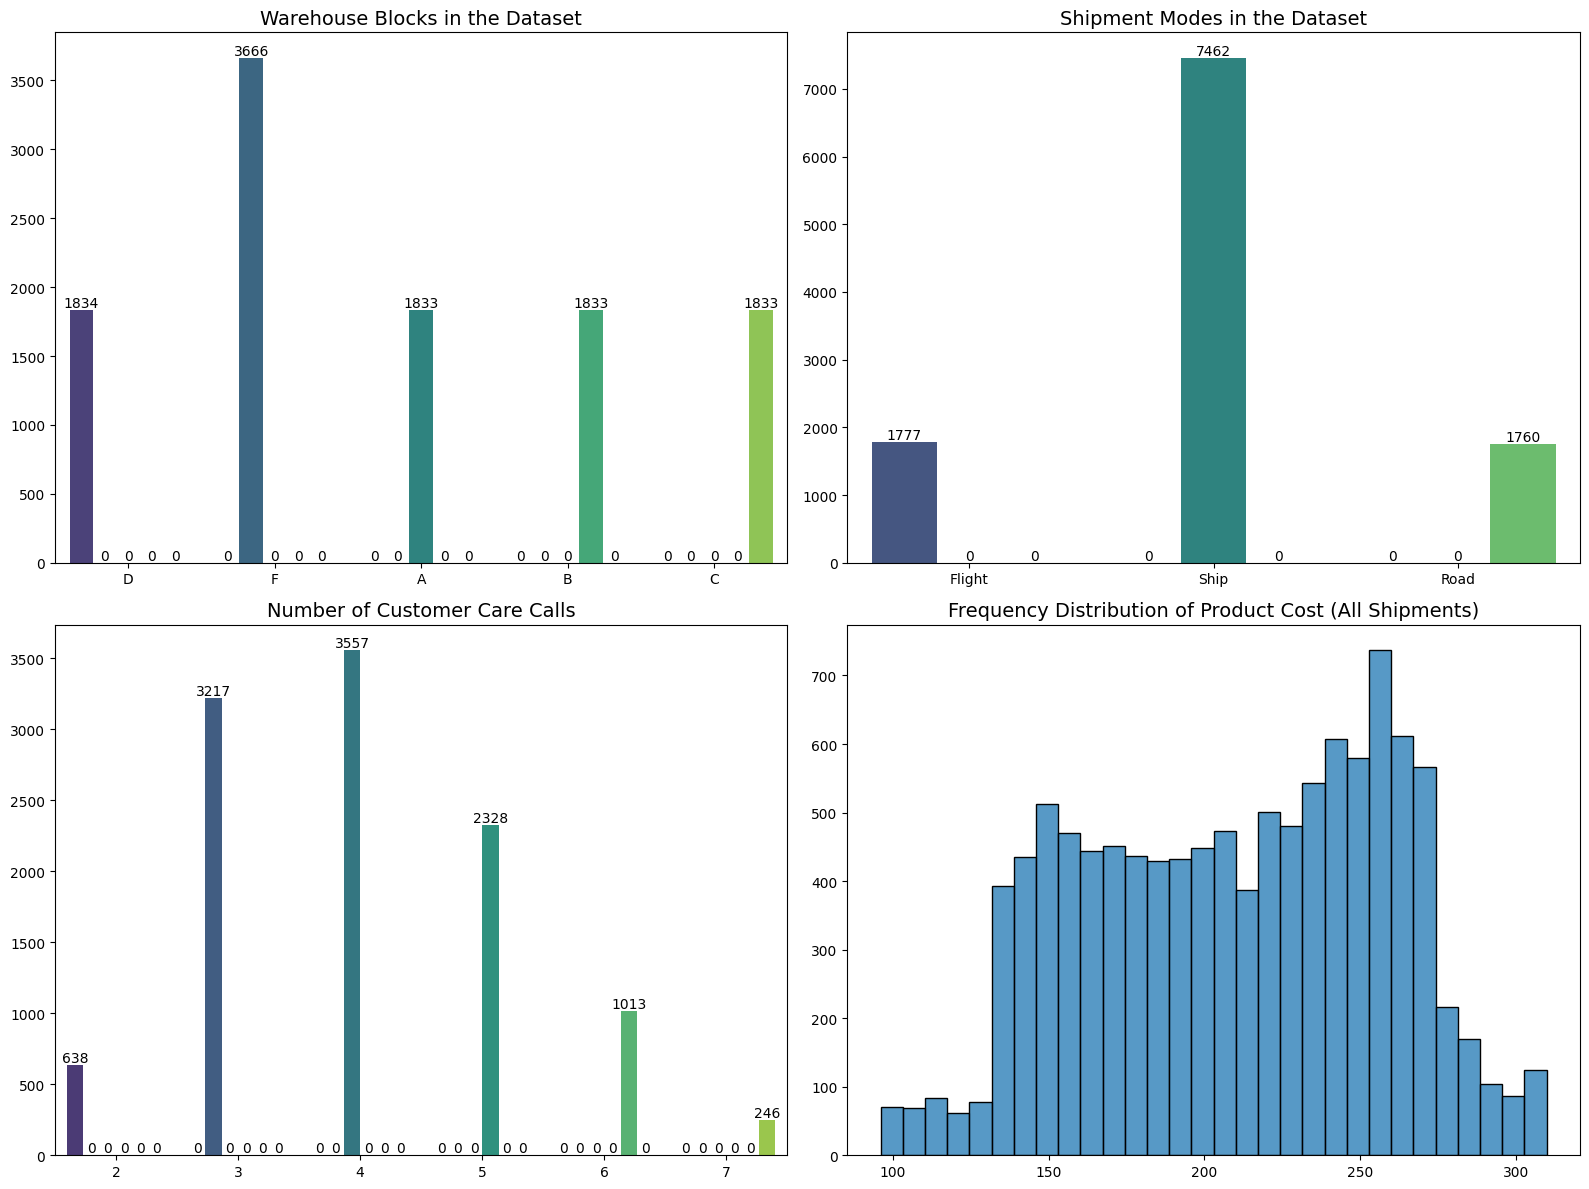

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 
plt.subplots_adjust(hspace=0.4, wspace=0.2) 

# --- Plot 1 (Top-Left: Warehouse blocks) ---
ax0 = axes[0, 0]
sns.countplot(
    data=df, 
    x='Warehouse_block', 
    palette='viridis', 
    hue='Warehouse_block',
    ax=ax0
)

ax0.get_figure().canvas.draw() 
if ax0.legend_ is not None:
    ax0.legend_.remove() # Manually remove legend

for bar in ax0.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = count
    ax0.text(x, y + 0.5, str(count), ha="center", va="bottom", fontsize=10)

ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Warehouse Blocks in the Dataset', fontsize=14)


# --- Plot 2 (Top-Right: Shipment Modes) ---
ax1 = axes[0, 1]
sns.countplot(
    data=df, 
    x='Mode_of_Shipment', 
    palette='viridis', 
    hue='Mode_of_Shipment',
    ax=ax1
)

ax1.get_figure().canvas.draw() 
if ax1.legend_ is not None:
    ax1.legend_.remove() # Manually remove legend

for bar in ax1.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = count
    ax1.text(x, y + 0.5, str(count), ha="center", va="bottom", fontsize=10)

ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Shipment Modes in the Dataset', fontsize=14)


# --- Plot 3 (Bottom-Left: Customer Care Calls) ---
ax2 = axes[1, 0]
sns.countplot(
    data=df,
    x='Customer_care_calls',
    palette='viridis',
    hue='Customer_care_calls',
    ax=ax2
)

ax2.get_figure().canvas.draw() 
if ax2.legend_ is not None:
    ax2.legend_.remove() # Manually remove legend

for bar in ax2.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = count
    ax2.text(x, y + 0.5, str(count), ha="center", va="bottom", fontsize=10)

ax2.set_xlabel("") 
ax2.set_ylabel("")
ax2.set_title('Number of Customer Care Calls', loc="center", fontsize=14)


# --- Plot 4 (Bottom-Right: Cost of the product) ---
ax3 = axes[1, 1]
sns.histplot(
    data=df,
    x='Cost_of_the_Product',
    ax=ax3
)

ax3.set_xlabel("") 
ax3.set_ylabel("") 
ax3.set_title('Frequency Distribution of Product Cost (All Shipments)', loc="center", fontsize=14)


# Final adjustment for clean display
plt.tight_layout()
plt.show()

<div style="page-break-after:always;"></div>

# Step 3: Dataset Questions
## Question 1: What was the Customer Rating? And was the product delivered on time?


Text(0.5, 0, 'Customer Rating')

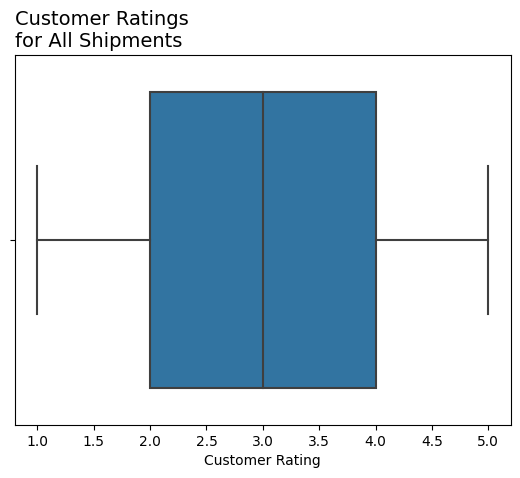

In [9]:
sns.boxplot(df, x='Customer_rating')
plt.title('Customer Ratings \nfor All Shipments', loc="left", fontsize=14)
plt.xlabel("Customer Rating")

### A Deeper Dive - Are there variables that correlate well to either to `Customer_care_calls` or `Customer_rating`?

/tmp/ipykernel_13/3398241300.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


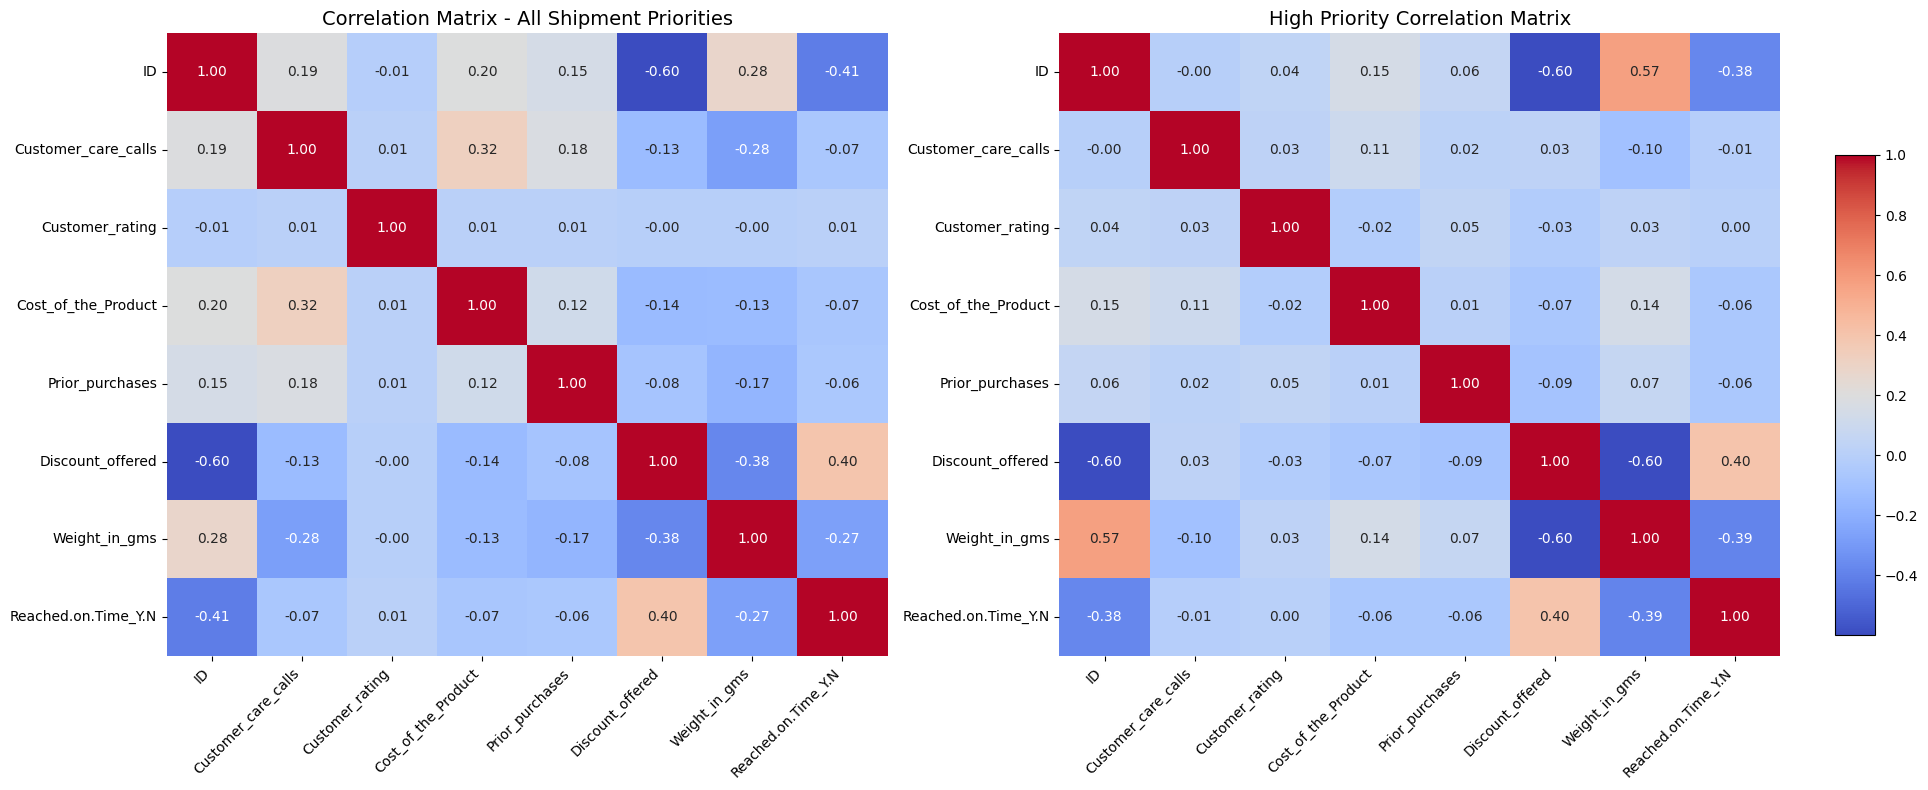

In [10]:
# --- 1. Prepare Data ---
q1_corr_matrix = df.corr(numeric_only=True)
important = df[df["Product_importance"] == "high"]
high_priority_corr_matrix = important.corr(numeric_only=True)

# --- 2. Setup the Figure and Axes ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) 

# --- 3. Plot 1: All Shipments Correlation Matrix (Left) ---
heatmap1 = sns.heatmap(
    q1_corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    ax=axes[0], 
    cbar=False
)
axes[0].set_title("Correlation Matrix - All Shipment Priorities", fontsize=14) 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].tick_params(axis='y', rotation=0)

# --- 4. Plot 2: High Priority Correlation Matrix (Right) ---
heatmap2 = sns.heatmap(
    high_priority_corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    ax=axes[1], 
    cbar=False
)
axes[1].set_title("High Priority Correlation Matrix", fontsize=14) 
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].tick_params(axis='y', rotation=0)

# --- 5. Add a Shared Colorbar ---
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6]) 

# Link the colorbar to the first heatmap
fig.colorbar(heatmap1.collections[0], cax=cbar_ax)

# --- 6. Final Adjustments ---
plt.tight_layout(rect=[0, 0, 0.9, 1])

# Display the side-by-side plot
plt.show()

## Question 2: Do more customer care calls correlate with late deliveries or lower customer satisfaction?

<p>One of the most critical scores in a competitive industry like logistics is the customer satisfaction score. Customers have a wide range of carriers depending on what they're shipping and to where they're shipping the item(s). Carriers in the third party logistics (3PL) segment such as UPS, DHL and FedEx understand this and know that late shipments lead to a quick decline in customer satisfaction. To check the performance of the shipments in this dataset, we've segmented the following variables from the above correlation plots for easier analysis.</p>

- Customer_care_calls
- Reached.on.Time_Y.N
- Customer_rating

In [11]:
'''
The variables in question to check this correlation are :
Customer_care_calls
Reached.on.Time_Y.N
Customer_rating
'''

print(round(df[['Customer_care_calls', 'Reached.on.Time_Y.N', 'Customer_rating']].corr(),4))

                     Customer_care_calls  Reached.on.Time_Y.N  Customer_rating
Customer_care_calls               1.0000              -0.0671           0.0122
Reached.on.Time_Y.N              -0.0671               1.0000           0.0131
Customer_rating                   0.0122               0.0131           1.0000


<p>The strongest correlation in the above segmentation pertaining to Customer Care calls is whether or not the item was deliverd on time. However, the correlation is considered weak with a score of -0.0671. This means that as the nubmer of calls increase, the likelihood of product not delivering on time slightly increases. The relationship is extremely weak and slightly negative, indicating that more customer care calls tend to occur when deliveries are not on time — but the effect is too small to be meaningful. After this analysis, we can conclude that the variables in this dataset do not contain empirically strong correlations to the number of Customer Care calls. Ergo, no, more calls to Customer Care do not correlate with late deliveries or customer satisfaction.</p>

## Question 3: For products with high importance, do they have the highest ratings or are they delivered on time?

<p>In the world of logistics, high priority means high stakes. In turn, high stakes creates high rewards. One of the fastest ways for third party logistics (3PL) firms to create a competitive advantage is to deliver cargo ahead of schedule; especially in high priority situations. In our dataset's final question, we will examine if there is a difference in customer ratings or on time delivery for high priority shipments. We will start this section by performing some analysis via scripting, then move on to data visualization and then conclude our findings. To make sure we are using only the high priority shipments, we will perform our analysis using the dataframe titled `important` that we created earlier.</p>

In [12]:
mode_summary_high = (
    important.groupby('Mode_of_Shipment')
    .size()
    .reset_index(name='Shipment Mode Totals')
)

# Get a percentile representation across the whole dataset
total_high_priority = mode_summary_high['Shipment Mode Totals'].sum()

mode_summary_high['% of Total Shipments'] = (
    mode_summary_high['Shipment Mode Totals']/total_high_priority
)*100

# Round the result to two decimal places
mode_summary_high['% of Total Shipments'] = mode_summary_high['% of Total Shipments'].round(2)

# Test the new dataframe
mode_summary_high


,Mode_of_Shipment,Shipment Mode Totals,% of Total Shipments
0,Flight,163,17.19
1,Road,158,16.67
2,Ship,627,66.14


In [13]:
# Find the integer-location index (iloc index) of the maximum value
iloc_index_of_max = mode_summary_high['Shipment Mode Totals'].idxmax()
iloc_index_of_min = mode_summary_high['Shipment Mode Totals'].idxmin()

# Use .iloc to find the row with the highest shipments
row_with_highest_shipments = mode_summary_high.iloc[iloc_index_of_max]
row_with_lowest_shipments = mode_summary_high.iloc[iloc_index_of_min]

# Extract values
highest_mode = row_with_highest_shipments['Mode_of_Shipment']
highest_total = row_with_highest_shipments['Shipment Mode Totals']
highest_percent = row_with_highest_shipments['% of Total Shipments']

lowest_mode = row_with_lowest_shipments['Mode_of_Shipment']
lowest_total = row_with_lowest_shipments['Shipment Mode Totals']
lowest_percent = row_with_lowest_shipments['% of Total Shipments']


total_shipments = row_with_highest_shipments['Mode_of_Shipment']

In [14]:
print("--High Priority Shipment Summaries--")
print(f"There are {sum(mode_summary_high['Shipment Mode Totals'])} shipments classified as high priority in our data.")
print(f"The mode with the most amount of shipments was {highest_mode}, with a total of {highest_total} ({highest_percent})% of all high priority shipments.")
print(f"The mode with the least amount of shipments was {lowest_mode}, with a total of {lowest_total} ({lowest_percent})% of all high priority shipments.")

--High Priority Shipment Summaries--
There are 948 shipments classified as high priority in our data.
The mode with the most amount of shipments was Ship, with a total of 627 (66.14)% of all high priority shipments.
The mode with the least amount of shipments was Road, with a total of 158 (16.67)% of all high priority shipments.


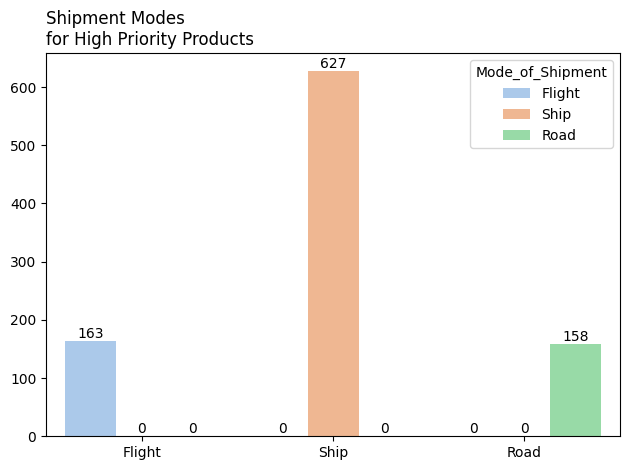

In [15]:
ax = sns.countplot(data=important, x = 'Mode_of_Shipment', hue = "Mode_of_Shipment", palette='pastel')

for bar in ax.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() /2
    y = count
    ax.text(x, y + 0.5, str(count), ha = "center", va = "bottom", fontsize = 10)

plt.title("Shipment Modes \nfor High Priority Products", loc="left")
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

Our initial analysis of the high priority shipments shows that roughly two-thirds of said shipments in our dataset werw shipped via ship. While it may seem odd that most of the shipments were shipped via ship, it's worth noting that over 80% of the world's freight is shipped through this mode as the main means of transport. It is worth noting that ocean freight will often use ground transportation via rail or truck to get the cargo to and from the port of embarcation (POE) or port of debarcation (POD). However, this dataset measures the main mode of transportation, vice auxilliary modes for first or final mile logistics. With this understanding, the next step is to visualize our dataset and see if high priority shipments have the highest rating/are delivered on time.

Text(0.5, 0, '')

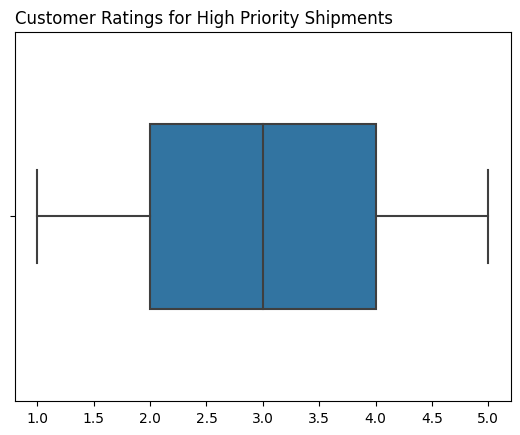

In [16]:
# Create a side by side boxplot and bar chart of the high priority shipments
# Create a figure with 1 row and 2 columns


# --- Boxplot (axes[0]) ---
# Assign the plot to the first axes object using 'ax=axes[0]'

sns.boxplot(data = important, x = 'Customer_rating', width = 0.5)
plt.title('Customer Ratings for High Priority Shipments', loc = "left")
plt.xlabel('')

In [17]:
print('--Customer Service Metrics for High Priority Shpments--')
print(f"The average customer service score for all shipments was {round(df['Customer_rating'].mean(),4)}.")
print(f"The average customer service score for high priority shipments was {round(important['Customer_rating'].mean(),4)}.")
print(f"With a difference of {round(important['Customer_rating'].mean() - df['Customer_rating'].mean(),4)}, high priority shipments scored marginally better.")

print("\n--Shipment Delivery Metrics for High Priority Shipments--")
print(f"Out of the {len(important)} high priority shipments, {len(important[important['Reached.on.Time_Y.N']==0])} were deliverd on time, whereas {len(important[important['Reached.on.Time_Y.N']==1])} were not delivered on time.")
print(f"For the high priority shipments this resulted in a {round(len(important[important['Reached.on.Time_Y.N']==0])/len(important),4)*100}% on time delivery rate.")
print(f"\nThe full dataset had {len(df)} high priority shipments, {len(df[df['Reached.on.Time_Y.N']==0])} were deliverd on time, whereas {len(df[df['Reached.on.Time_Y.N']==1])} were not delivered on time.")
print(f"For all shipments this resulted in a {round(len(df[df['Reached.on.Time_Y.N']==0])/len(df),4)*100}% on time delivery rate.")
print(f"When compared to the full dataset, high priority shipments had a {round(len(df[df['Reached.on.Time_Y.N']==0])/len(df),4)*100 - round(len(important[important['Reached.on.Time_Y.N']==0])/len(important),4)*100:.2f}% lower on time rate.")


--Customer Service Metrics for High Priority Shpments--
The average customer service score for all shipments was 2.9905.
The average customer service score for high priority shipments was 2.9937.
With a difference of 0.0031, high priority shipments scored marginally better.

--Shipment Delivery Metrics for High Priority Shipments--
Out of the 948 high priority shipments, 332 were deliverd on time, whereas 616 were not delivered on time.
For the high priority shipments this resulted in a 35.02% on time delivery rate.

The full dataset had 10999 high priority shipments, 4436 were deliverd on time, whereas 6563 were not delivered on time.
For all shipments this resulted in a 40.33% on time delivery rate.
When compared to the full dataset, high priority shipments had a 5.31% lower on time rate.


In answering the third question for the dataset, the answer is yes and no. Yes, the high priority shipments scored marginally better than the other priority levels. However, this score is negligible as it's 0.0031 better (on a scale of 0 to 5). Interestingly, the high priority shipments actually scored measurably lower in terms of on time delivery when compared to all shipments. While speculative, there could be a number of resons for this such as:
- Delays in customs clearance at the ports
- Difficulty in finding drivers to deliver the load
- Heavy seasonal volume at points along the chain

# Conclusion
<p> In exploring this dataset of E-Commerce shipping, we've delved into an analysis of 10,999 shipments across 5 warehouses. The analysis laid out in this experiment highlighted operational strengths and opportunities for improvment in this highly competitive industry. At its core, this analysis addresses the intersections of delivery performance, customer satisfaction and product priority, all key drivers within the industry.</p>
<p> On a deeper level, this dataset also paints a cautionary tale. In a landscape where Amazon Prime now guarantees some packages as same day delivery, speed is key. The late delivery rate of 64% in this dataset should ring alarm bells for managers looking to drive change. To remain relevant in the logistics industry, companies must tie speed to value; as shown here.</p>